# Forecasting Konsumsi Daya Listrik Harian Menggunakan RNN

## **Studi Kasus pada Dataset Beban Listrik** ##
#### Nama Anggota Kelompok : ####
#### - Hafizh Hilman Asyhari (202331206)
#### - Anjeli Rizki Syamiaputri (202331065)
#### Kelas : D
#### Dosen : Ir. Abdul Haris, S.Kom., M.Kom
#### Program Studi : S1 Teknik Informatika
#### 2025
Notebook ini melakukan prediksi konsumsi daya listrik harian selama 7 hari ke depan berdasarkan data historis beban listrik pagi, siang, sore, dan malam.


In [2]:
# === 1. Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# === 2. Import Library ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import datetime

In [4]:
# === 3. Load Dataset Excel dari Google Drive ===

# Menyimpan path file Excel yang berada di Google Drive
file_path = '/content/drive/MyDrive/Kecerdasan-Buatan-2025/Dataset_beban_listrik.xlsx'

# Membaca file Excel dan memasukkannya ke dalam DataFrame pandas
df = pd.read_excel(file_path)
# Mengonversi kolom 'Tanggal' menjadi format datetime agar bisa digunakan sebagai index waktu
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Menjadikan kolom 'Tanggal' sebagai index utama dari DataFrame untuk analisis time-series
df.set_index('Tanggal', inplace=True)
# Menampilkan 5 baris pertama dari data untuk mengecek apakah data berhasil dimuat dengan benar
print("Contoh data:")
print(df.head())

Contoh data:
            Beban_Pagi  Beban_Siang  Beban_Sore  Beban_Malam
Tanggal                                                     
2025-01-01  309.934283   378.571061  446.737196   550.454902
2025-01-02  297.234714   373.227688  462.051352   413.492442
2025-01-03  312.953771   412.061810  470.704320   472.108666
2025-01-04  330.460597   394.413430  437.963386   520.197524
2025-01-05  295.316933   417.850012  456.722774   492.893411


In [5]:
# === 4. Hitung Total Beban Harian ===

# Menjumlahkan beban dari pagi, siang, sore, dan malam untuk mendapatkan total beban listrik harian
df['Total_Beban'] = df[['Beban_Pagi', 'Beban_Siang', 'Beban_Sore', 'Beban_Malam']].sum(axis=1)

# Menyimpan hanya kolom total beban sebagai data yang akan diproses
beban = df[['Total_Beban']]

# Membuat objek MinMaxScaler untuk normalisasi data ke dalam rentang 0 hingga 1
scaler = MinMaxScaler()

# Melakukan normalisasi data total beban agar model lebih stabil saat training
beban_scaled = scaler.fit_transform(beban)

# Fungsi untuk membuat dataset time series
# Setiap input berisi 7 hari berturut-turut, dan output-nya adalah beban pada hari ke-8
def create_dataset(dataset, time_step=7):
    X, Y = [], []
    # Loop dari awal hingga data yang masih memungkinkan untuk membuat input 7 hari
    for i in range(len(dataset) - time_step):
        # Mengambil 7 nilai sebelumnya sebagai input (X)
        X.append(dataset[i:i+time_step, 0])
        # Mengambil nilai ke-8 sebagai target/output (Y)
        Y.append(dataset[i+time_step, 0])
    # Mengembalikan array numpy dari pasangan input dan output
    return np.array(X), np.array(Y)

# Membuat pasangan data input dan output dari data beban listrik yang sudah dinormalisasi
X, y = create_dataset(beban_scaled, time_step=7)

# Mereshape input agar sesuai dengan format yang dibutuhkan oleh model RNN: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [6]:
# === 5. Bangun Model RNN ===
model = Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Latih model
model.fit(X, y, epochs=60, batch_size=16, verbose=1)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1413
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0373 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0311 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0316 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 
Epoch 13/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0320 
Epoch 14/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 
Epoch 15/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0251 
Epoch 16/60
11/1

In [7]:
# === 6. Prediksi 7 Hari ke Depan ===
forecast_days = 7
last_seq = beban_scaled[-7:]
input_seq = last_seq.reshape(1, 7, 1)
predicted = []

for _ in range(forecast_days):
    pred = model.predict(input_seq)[0][0]
    predicted.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

# Kembalikan ke skala asli
forecast = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))

# Tanggal prediksi
forecast_dates = [beban.index[-1] + datetime.timedelta(days=i+1) for i in range(forecast_days)]
forecast_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi_Total_Beban': forecast.flatten()})
forecast_df.set_index('Tanggal', inplace=True)

# Tampilkan hasil prediksi
print("Prediksi Beban Listrik 7 Hari ke Depan:")
print(forecast_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi Beban Listrik 7 Hari ke Depan:
            Prediksi_Total_Beban
Tanggal                         
2025-07-01           1656.282349
2025-07-02           1657.514771
2025-07-03           1660.627319
2025-07-04           1643.809814
2025-07-05           1666.473511
2025-07-06           1663.857788
2025-07-07           1654.259277


In [10]:
# === 7. Visualisasi ===
plt.figure(figsize=(12,6))
plt.plot(beban.index[-30:], beban['Total_Beban'][-30:], label='Data Aktual (30 Hari Terakhir)')
plt.plot(forecast_df.index, forecast_df['Prediksi_Total_Beban'], label='Prediksi 7 Hari ke Depan', marker='o', linestyle='--')
plt.title('Forecasting Konsumsi Daya Listrik Harian Menggunakan RNN')
plt.xlabel('Tanggal')
plt.ylabel('Total Beban Listrik (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
RMSE Pelatihan: 53.53 MWh


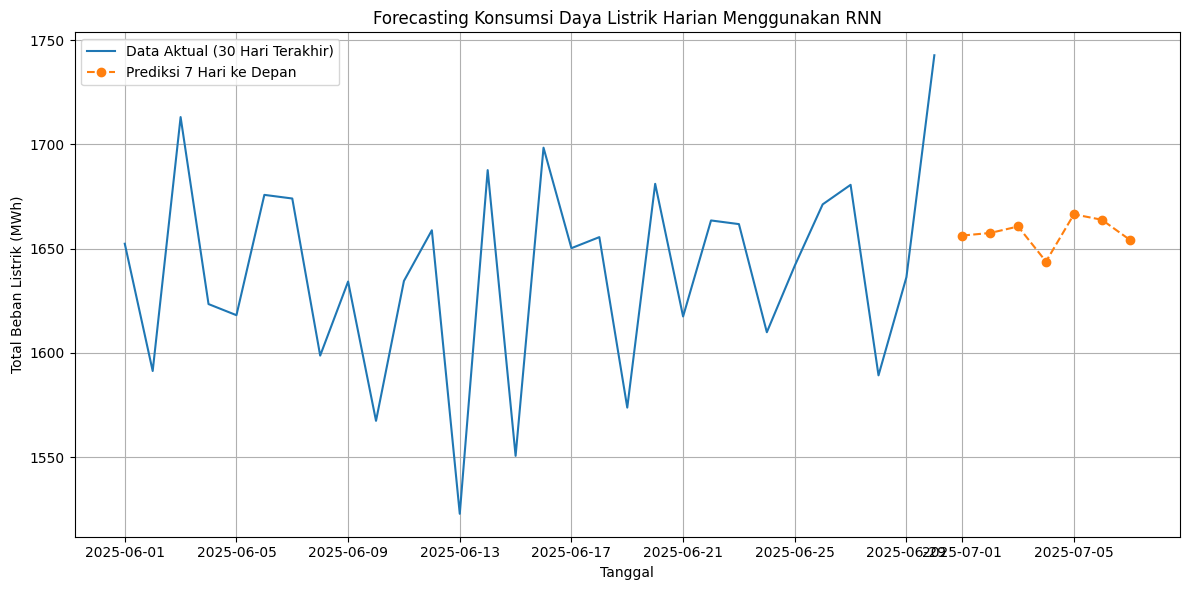

In [11]:
# === 7. Visualisasi ===
plt.figure(figsize=(12,6))
plt.plot(beban.index[-30:], beban['Total_Beban'][-30:], label='Data Aktual (30 Hari Terakhir)')
plt.plot(forecast_df.index, forecast_df['Prediksi_Total_Beban'], label='Prediksi 7 Hari ke Depan', marker='o', linestyle='--')
plt.title('Forecasting Konsumsi Daya Listrik Harian Menggunakan RNN')
plt.xlabel('Tanggal')
plt.ylabel('Total Beban Listrik (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


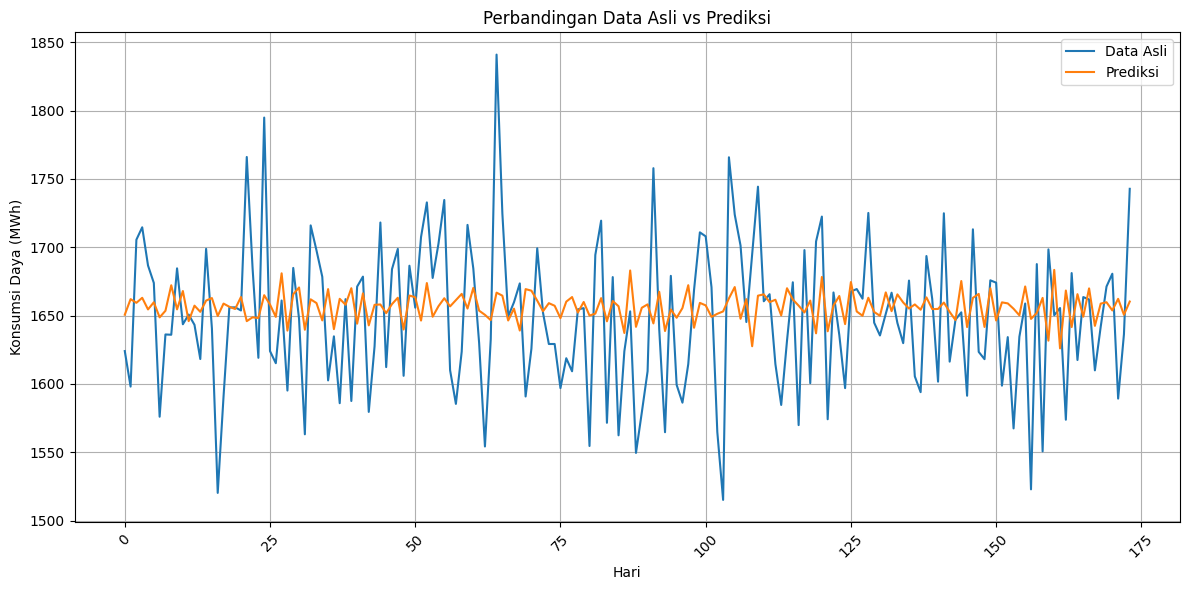

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inverse, label='Data Asli')
plt.plot(y_pred_train_inverse, label='Prediksi')
plt.title('Perbandingan Data Asli vs Prediksi')
plt.xlabel('Hari')
plt.ylabel('Konsumsi Daya (MWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()